In [1]:
import pandas as pd 
import numpy as np 
import requests
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
water = pd.read_csv(r"C:\Users\blang\Desktop\data\Water_FINAL.csv", low_memory=False)

In [3]:
water.head(3)

,Unnamed: 0,Unnamed: 0.1,Agency,BiasPC,CloudCover,Comments,Cruise,Database,Date,FieldActivityEventType,FieldActivityRemark,FlowStage,GaugeHeight,GroupCode,HUC12,Lab,Latitude,Layer,Longitude,LowerPycnocline,MeasureValue,Method,ModifiedDate,Other Comments,Other Conditions,Parameter,ParameterName_CBP,ParameterName_CMC,PrecipType,PrecisionPC,Pressure,Problem,Program,Project,Qualifier,Rainfall,Rainfall Within 24 Hours,Rainfall Within 48 Hours,SampleDepth,SampleId,SampleReplicateType,SampleType,Sea State,Source,Station,StationCode,StationName,Stream Flow,Tidal Stage,TideStage,TierLevel,Time,TotalDepth,Unit,UpperPycnocline,Water Color,Water Color Description,Water Odor,Water Odor Description,Water Surfaces,WaveHeight,Weather Conditions Day Before Yesterday,Weather Conditions Today,Weather Conditions Yesterday,WindDirection,WindSpeed,state,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_
0,0,2143,NaN,NaN,NaN,NaN,NaN,CMC,04/28/2018,NaN,NaN,NaN,NaN,FB,NaN,NaN,39.480194,NaN,-75.930028,NaN,14.970,NaN,2020-04-25T17:31:58.767,NaN,NaN,CHL.3,ACTIVE CHLOROPHYLL-A,Chlorophyll a;b;c,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,7.8,0.5,1.0,NaN,NaN,NaN,NaN,NaN,FB.FOBBT01,FOB BT01,NaN,Outgoing (Ebb),NaN,p2,12:05:00,NaN,ug/L,NaN,NaN,Muddy,NaN,NaN,NaN,NaN,NaN,Partly cloudy,NaN,W,1-10 knots,MD,POINT (-75.93002800000002 39.480194),20600020206,Bohemia River,24015,Cecil County,MD
1,1,2145,NaN,NaN,NaN,NaN,NaN,CMC,04/28/2018,NaN,NaN,NaN,NaN,FB,NaN,NaN,39.480444,NaN,-75.902528,NaN,20.002,NaN,2020-04-25T17:31:59.173,NaN,NaN,CHL.3,ACTIVE CHLOROPHYLL-A,Chlorophyll a;b;c,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,7.8,0.5,1.0,NaN,NaN,NaN,NaN,NaN,FB.FOBBT02,FOB BT02,NaN,Outgoing (Ebb),NaN,p2,12:40:00,NaN,ug/L,NaN,NaN,Muddy,NaN,NaN,NaN,NaN,NaN,Partly cloudy,NaN,W,1-10 knots,MD,POINT (-75.902528 39.480444),20600020206,Bohemia River,24015,Cecil County,MD
2,2,2147,NaN,NaN,NaN,NaN,NaN,CMC,04/28/2018,NaN,NaN,NaN,NaN,FB,NaN,NaN,39.466889,NaN,-75.873639,NaN,26.204,NaN,2020-04-25T17:31:59.36,NaN,NaN,CHL.3,ACTIVE CHLOROPHYLL-A,Chlorophyll a;b;c,NaN,NaN,NaN,E,NaN,NaN,NaN,NaN,NaN,7.8,0.5,1.0,NaN,NaN,NaN,NaN,NaN,FB.FOBBT03,FOB BT03,NaN,Outgoing (Ebb),NaN,p2,13:13:00,NaN,ug/L,NaN,NaN,Muddy,NaN,NaN,NaN,NaN,NaN,Partly cloudy,NaN,S,1-10 knots,MD,POINT (-75.873639 39.466889),20600020206,Bohemia River,24015,Cecil County,MD


In [4]:
stream_health = pd.read_csv(r"C:\Users\blang\Desktop\data\Benthic_Stream_Health.csv", low_memory=False)

In [5]:
stream_health.head(3)

,Unnamed: 0,unique_id,event_id,sample_num,icprb_bioregion_id,station_id,sample_date,chessie_bibi,rating,Latitude,Longitude,Data Source,Group_or_Agency,HUC12,HUCNAME,FIPS,STATE,COUNTY
0,0,74228_1,74228,1,napu,BNTY005.7-4176,7/26/2006,50.326099,good,41.94361,-76.71500,CBP,SRBC,20501050602,Middle Bentley Creek,42015,PA,Bradford County
1,1,74231_1,74231,1,napu,BNTY002.5-4176,7/26/2006,56.969635,good,41.98583,-76.72278,CBP,SRBC,20501050603,Lower Bentley Creek,42015,PA,Bradford County
2,2,74233_1,74233,1,napu,BNTY000.4-4276,7/26/2006,53.735738,good,42.01194,-76.73139,CBP,SRBC,20501050603,Lower Bentley Creek,36015,NY,Chemung County


In [6]:
stream_health['sample_date'].min(), stream_health['sample_date'].max()

('10/1/2006', '9/9/2017')

In [7]:
stream_health['sample_date'] = pd.to_datetime(stream_health['sample_date'])

In [8]:
stream_health.head(2)

,Unnamed: 0,unique_id,event_id,sample_num,icprb_bioregion_id,station_id,sample_date,chessie_bibi,rating,Latitude,Longitude,Data Source,Group_or_Agency,HUC12,HUCNAME,FIPS,STATE,COUNTY
0,0,74228_1,74228,1,napu,BNTY005.7-4176,2006-07-26,50.326099,good,41.94361,-76.71500,CBP,SRBC,20501050602,Middle Bentley Creek,42015,PA,Bradford County
1,1,74231_1,74231,1,napu,BNTY002.5-4176,2006-07-26,56.969635,good,41.98583,-76.72278,CBP,SRBC,20501050603,Lower Bentley Creek,42015,PA,Bradford County


In [9]:
datetime_series = pd.to_datetime(stream_health['sample_date'])

In [10]:
datetime_index = pd.DatetimeIndex(datetime_series.values)

In [11]:
stream_health = stream_health.set_index(datetime_index)

In [12]:
stream_health.tail(3)

,Unnamed: 0,unique_id,event_id,sample_num,icprb_bioregion_id,station_id,sample_date,chessie_bibi,rating,Latitude,Longitude,Data Source,Group_or_Agency,HUC12,HUCNAME,FIPS,STATE,COUNTY
2011-03-25,7370,95747_1,95747,1,pied,J06010,2011-03-25,19.833402,very_poor,37.37977,-78.22224,CBP,VCU/LHL,20802070403,Sandy Creek-Appomattox River,51007,VA,Amelia County
2011-03-28,7371,95752_1,95752,1,pied,2BXAD000.07,2011-03-28,53.603058,poor,37.74580,-78.49090,CBP,VADEQ,20802031104,Little George Creek-James River,51029,VA,Buckingham County
2011-03-28,7372,95755_1,95755,1,pied,2BXZF000.38,2011-03-28,54.942951,poor,37.53320,-78.52240,CBP,VADEQ,20802031303,Horsepen Creek-Slate River,51029,VA,Buckingham County


In [13]:
stream_health.index.rename('Date', inplace=True)

In [14]:
stream_health.head()

,Unnamed: 0,unique_id,event_id,sample_num,icprb_bioregion_id,station_id,sample_date,chessie_bibi,rating,Latitude,Longitude,Data Source,Group_or_Agency,HUC12,HUCNAME,FIPS,STATE,COUNTY
Date,,,,,,,,,,,,,,,,,,
2006-07-26,0,74228_1,74228,1,napu,BNTY005.7-4176,2006-07-26,50.326099,good,41.94361,-76.71500,CBP,SRBC,20501050602,Middle Bentley Creek,42015,PA,Bradford County
2006-07-26,1,74231_1,74231,1,napu,BNTY002.5-4176,2006-07-26,56.969635,good,41.98583,-76.72278,CBP,SRBC,20501050603,Lower Bentley Creek,42015,PA,Bradford County
2006-07-26,2,74233_1,74233,1,napu,BNTY000.4-4276,2006-07-26,53.735738,good,42.01194,-76.73139,CBP,SRBC,20501050603,Lower Bentley Creek,36015,NY,Chemung County
2006-07-26,3,74236_1,74236,1,napu,SOUT009.1-4176,2006-07-26,53.302979,good,41.95472,-76.79222,CBP,SRBC,20501050506,South Creek,42015,PA,Bradford County
2008-06-23,4,74334_1,74334,1,napu,MEHO001.5-4176,2008-06-23,55.619394,good,41.56000,-76.06778,CBP,SRBC,20501060903,Lower Mehoopany Creek,42131,PA,Wyoming County


In [15]:
stream_health.drop(columns='sample_date', inplace=True)
stream_health.drop(columns='Unnamed: 0', inplace=True)

In [16]:
stream_health

,unique_id,event_id,sample_num,icprb_bioregion_id,station_id,chessie_bibi,rating,Latitude,Longitude,Data Source,Group_or_Agency,HUC12,HUCNAME,FIPS,STATE,COUNTY
Date,,,,,,,,,,,,,,,,
2006-07-26,74228_1,74228,1,napu,BNTY005.7-4176,50.326099,good,41.94361,-76.71500,CBP,SRBC,20501050602,Middle Bentley Creek,42015,PA,Bradford County
2006-07-26,74231_1,74231,1,napu,BNTY002.5-4176,56.969635,good,41.98583,-76.72278,CBP,SRBC,20501050603,Lower Bentley Creek,42015,PA,Bradford County
2006-07-26,74233_1,74233,1,napu,BNTY000.4-4276,53.735738,good,42.01194,-76.73139,CBP,SRBC,20501050603,Lower Bentley Creek,36015,NY,Chemung County
2006-07-26,74236_1,74236,1,napu,SOUT009.1-4176,53.302979,good,41.95472,-76.79222,CBP,SRBC,20501050506,South Creek,42015,PA,Bradford County
2008-06-23,74334_1,74334,1,napu,MEHO001.5-4176,55.619394,good,41.56000,-76.06778,CBP,SRBC,20501060903,Lower Mehoopany Creek,42131,PA,Wyoming County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-03-25,95745_1,95745,1,pied,J06018,28.190242,very_poor,37.45992,-78.15132,CBP,VCU/LHL,20802070405,Little Guinea Creek-Appomattox River,51049,VA,Cumberland County
2011-03-25,95746_1,95746,1,pied,J06013,35.767173,poor,37.41385,-78.14244,CBP,VCU/LHL,20802070406,Stock Creek,51007,VA,Amelia County
2011-03-25,95747_1,95747,1,pied,J06010,19.833402,very_poor,37.37977,-78.22224,CBP,VCU/LHL,20802070403,Sandy Creek-Appomattox River,51007,VA,Amelia County


In [17]:
stream_health.sort_values(by='Date', inplace=True)

In [18]:
stream_health

,unique_id,event_id,sample_num,icprb_bioregion_id,station_id,chessie_bibi,rating,Latitude,Longitude,Data Source,Group_or_Agency,HUC12,HUCNAME,FIPS,STATE,COUNTY
Date,,,,,,,,,,,,,,,,
1994-04-30,1767_1,1767,1,lnp,"ANS.SITE 6, ROCK CREEK AT MUNCASTER MILL ROAD",55.593878,poor,39.13803,-77.12872,CMC,ANS,20700100101,Upper Rock Creek,24031,MD,Montgomery County
1994-04-30,121_1,121,1,blue,ANS.NW-NW 13,9.100817,very_poor,39.06963,-77.97016,CMC,ANS,20700070201,Chapel Run-Shenandoah River,51043,VA,Clarke County
1994-04-30,447_1,447,1,lnp,"ANS.SITE 14, DAYSPRING CREEK",69.519411,poor,39.20321,-77.22988,CMC,ANS,20700080802,Great Seneca Creek,24031,MD,Montgomery County
1994-05-01,542_1,542,1,lnp,"ANS.SITE 15, COUNTRYSIDE TRIBUTARY OF PAINT BR...",5.694700,very_poor,39.08736,-76.96345,CMC,ANS,20700100202,Paint Branch,24031,MD,Montgomery County
1994-05-08,2034_1,2034,1,lnp,ANS.UR-RC 4,83.519834,good,39.15474,-77.13165,CMC,ANS,20700100101,Upper Rock Creek,24031,MD,Montgomery County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-20,2172_1,2172,1,lnp,RAS.09-PL21-SUG-SLR4,29.271670,very_poor,38.97879,-77.36440,CMC,RAS,20700080905,Sugarland Run,51059,VA,Fairfax County
2019-11-20,2250_1,2250,1,pied,RAS.09-PL22-SNA-DR30,33.384617,poor,38.92889,-77.33970,CMC,RAS,20700081004,Difficult Run,51059,VA,Fairfax County
2019-11-20,2974_1,2974,1,pied,VSOS.PIPE DAM RUN-1,39.336360,poor,38.33279,-77.61132,CMC,VASOS,20801040101,Motts Run Reservoir-Rappahannock River,51177,VA,Spotsylvania County


In [19]:
samples = pd.read_csv(r"C:\Users\blang\Desktop\data\BenthicSamples.csv", low_memory=False)

In [20]:
samples.head(3)

,DateTime,Date,Time,StationCode,StationName,GroupName,Latitude,Longitude,Benthic Classification Name,Benthic Classification Code,Count,Comments,Active Construction,Algae Color,Algae Located,Aquatic Veg/Decaying Matter,Area 1 Sampled,Area 2 Sampled,Area 3 Sampled,Area 4 Sampled,Barriers To Fish Movement,Bottom Type,Channel Width,Collection Time (Net 1),Collection Time (Net 2),Collection Time (Net 3),Collection Time (Net 4),Cropland,Define Other Bank Composition,Define Other Land Use,Define Other Organism,Describe the Amount and Type of Litter,Discharge Pipes,Fields,Fish Water Quality Indicators,Forest,Housing Development,Indicate Current and Potential Threats,Livestock Pasture,Logging,Mining,Number of Discharge Pipes,Number of Squirts,Odor,Oil and Gas Drilling,Other Land Use,Percent Algae,Percent Bare Soil,Percent Boulders,Percent Cobbles,Percent Grass,Percent Gravel,Percent Other,Percent Rocks,Percent Sand,Percent Shrubs,Percent Silt,Percent Trees,Precipitation,Sanitary Landfill,Silt/Sand/Gravel,Snags/Logs Jabs,Snags/Logs,Stability of Stream,Stream Bed Deposit,Stream Channel Erosion,Stream Channel Shade,Stream Flow,Surface Water Appearance,Trash Dump,Type of Cropland,Type of Mining,Type of Pipes,Urban Uses,Vegetated Jabs,Vegetated,Weather Conditions,Weather Last 72 Hours
0,2016-01-03T12:00:00,01/03/2016,12:00:00,VSOS.09-PL30-Acc-ACC9,09-PL30-Acc-ACC9,Virginia Save Our Streams,38.8533,-77.2456,Dragonflies and Damselflies,DD,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rocky,NaN,21-89,21-89,21-89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cool and dry
1,2016-01-03T12:00:00,01/03/2016,12:00:00,VSOS.09-PL30-Acc-ACC9,09-PL30-Acc-ACC9,Virginia Save Our Streams,38.8533,-77.2456,Scuds,SC,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rocky,NaN,21-89,21-89,21-89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cool and dry
2,2016-01-03T12:00:00,01/03/2016,12:00:00,VSOS.09-PL30-Acc-ACC9,09-PL30-Acc-ACC9,Virginia Save Our Streams,38.8533,-77.2456,Flatworms,F,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,rocky,NaN,21-89,21-89,21-89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cool and dry


In [21]:
samples.columns

Index(['DateTime', 'Date', 'Time', 'StationCode', 'StationName', 'GroupName',
       'Latitude', 'Longitude', 'Benthic Classification Name',
       'Benthic Classification Code', 'Count', 'Comments',
       'Active Construction', 'Algae Color', 'Algae Located',
       'Aquatic Veg/Decaying Matter', 'Area 1 Sampled', 'Area 2 Sampled',
       'Area 3 Sampled', 'Area 4 Sampled', 'Barriers To Fish Movement',
       'Bottom Type', 'Channel Width', 'Collection Time (Net 1)',
       'Collection Time (Net 2)', 'Collection Time (Net 3)',
       'Collection Time (Net 4)', 'Cropland', 'Define Other Bank Composition',
       'Define Other Land Use', 'Define Other Organism',
       'Describe the Amount and Type of Litter', 'Discharge Pipes', 'Fields',
       'Fish Water Quality Indicators', 'Forest', 'Housing Development',
       'Indicate Current and Potential Threats', 'Livestock Pasture',
       'Logging', 'Mining', 'Number of Discharge Pipes', 'Number of Squirts',
       'Odor', 'Oil and Gas Dr

In [22]:
samples.isna().sum().sort_values(ascending = False)

Snags/Logs Jabs                           19477
Vegetated Jabs                            19477
Aquatic Veg/Decaying Matter               19477
Snags/Logs                                19477
Precipitation                             19475
Area 4 Sampled                            19475
Area 3 Sampled                            19465
Type of Pipes                             19464
Number of Discharge Pipes                 19459
Number of Squirts                         19456
Silt/Sand/Gravel                          19454
Vegetated                                 19454
Weather Conditions                        19452
Discharge Pipes                           19432
Area 2 Sampled                            19342
Area 1 Sampled                            19214
Define Other Bank Composition             19173
Type of Mining                            19168
Define Other Land Use                     18772
Type of Cropland                          18720
Percent Gravel                          

In [23]:
water['Date'] = pd.to_datetime(water['Date'])

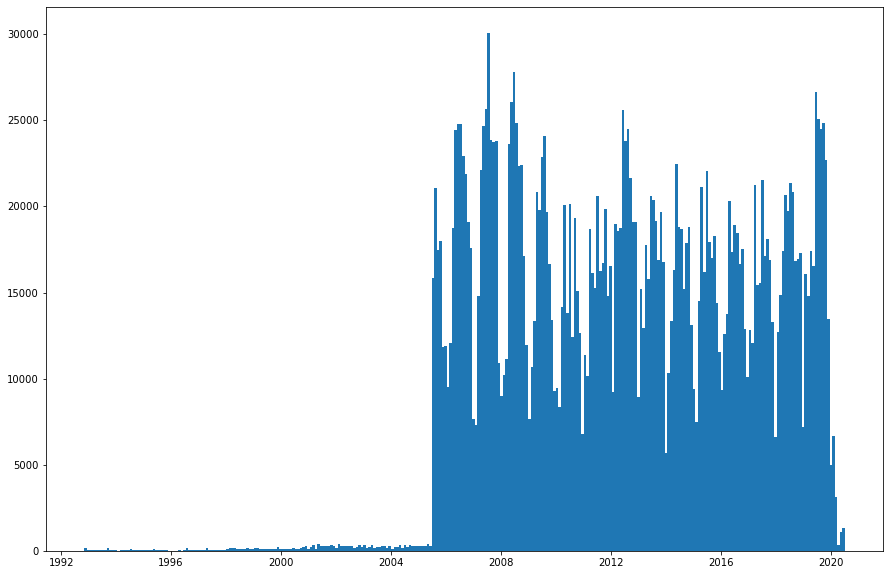

In [24]:
fig, ax = plt.subplots(figsize=(15,10))
hist = ax.hist(water['Date'], bins=300)
plt.show()

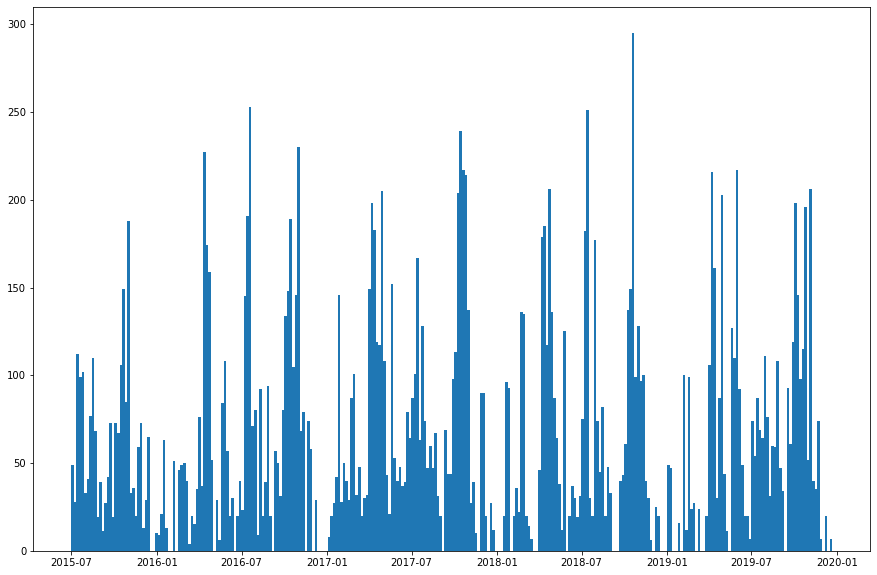

In [25]:
samples['DateTime'] = pd.to_datetime(samples['DateTime'])
fig, ax = plt.subplots(figsize=(15,10))
hist = ax.hist(samples['DateTime'], bins=300)
plt.show()

In [26]:
CMC = pd.read_excel(r"C:\Users\blang\Desktop\data\CMC_Benthic_Data.xlsx")

In [27]:
CMC.head(3)

,EVENT_ID,SAMPLE_NUMBER,STATION_ID,ICPRB_BIOREGION_ID,STRAHLER_STREAM_ORDER,G_Method,SAMPLE_DATE,MONTH,Latitude,Longitude,FINAL_ID,REPORTING_VALUE,TSN_FINAL,TAXON_LEVEL,PHYLUM,SUBPHYLUM,CLASS,SUBCLASS,ORDER,SUBORDER,FAMILY,SUBFAMILY,TRIBE,GENUS,SPECIES,ASPT,BIBI_TV,BIBI_FFG,BIBI_HABIT
0,956,1,"ANS.Site 23, Pinehurst Branch",LNP,NaN,93,2016-01-09 00:00:00,1,38.9719,-77.044167,PLANARIIDAE,3,54502,FAM,PLATYHELMINTHES,RHABDITOPHORA,TREPAXONEMATA,0,NEOOPHORA,0,PLANARIIDAE,0,0,0,0,5,8,CG,SP
1,1570,1,"ANS.Site 38, Northwest Branch at Kemp Mill Road",LNP,NaN,93,2016-01-09 00:00:00,1,39.0613,-77.023961,PLANARIIDAE,1,54502,FAM,PLATYHELMINTHES,RHABDITOPHORA,TREPAXONEMATA,0,NEOOPHORA,0,PLANARIIDAE,0,0,0,0,5,8,CG,SP
2,964,1,"ANS.Site 23, Pinehurst Branch",LNP,NaN,93,2018-01-20 00:00:00,1,38.9719,-77.044167,PLANARIIDAE,1,54502,FAM,PLATYHELMINTHES,RHABDITOPHORA,TREPAXONEMATA,0,NEOOPHORA,0,PLANARIIDAE,0,0,0,0,5,8,CG,SP


In [28]:
CBP = pd.read_csv(r"C:\Users\blang\Desktop\data\CBP_Benthic.csv")

In [29]:
CBP.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Active Construction,Agency,Algae Color,Algae Located,Aquatic Veg/Decaying Matter,Area 1 Sampled,Area 2 Sampled,Area 3 Sampled,Area 4 Sampled,Barriers To Fish Movement,Benthic Classification Code,Benthic Classification Name,BioMethod,Bottom Type,Channel Width,Collection Time (Net 1),Collection Time (Net 2),Collection Time (Net 3),Collection Time (Net 4),Comments,Count,CountyCity,Cropland,Database,Date,DateTime,Define Other Bank Composition,Define Other Land Use,Define Other Organism,Describe the Amount and Type of Litter,Discharge Pipes,EcoRegionLevel3,EcoRegionLevel3Description,EventId,FIPS,Fields,Fish Water Quality Indicators,Forest,GMethod,GroupName,HUC12,HUC12Description,HUC8,HUC8Description,Housing Development,Indicate Current and Potential Threats,Latitude,LifeStageCode,Livestock Pasture,Logging,Longitude,Mining,Number of Discharge Pipes,Number of Squirts,Odor,Oil and Gas Drilling,Other Land Use,Percent Algae,Percent Bare Soil,Percent Boulders,Percent Cobbles,Percent Grass,Percent Gravel,Percent Other,Percent Rocks,Percent Sand,Percent Shrubs,Percent Silt,Percent Trees,Precipitation,ReportingUnits,ReportingValue,SampleType,Sanitary Landfill,Silt/Sand/Gravel,Snags/Logs,Snags/Logs Jabs,Stability of Stream,State,Station,StationCode,StationName,Stream Bed Deposit,Stream Channel Erosion,Stream Channel Shade,Stream Flow,Surface Water Appearance,TSN,Time,Trash Dump,Type of Cropland,Type of Mining,Type of Pipes,Urban Uses,Vegetated,Vegetated Jabs,Weather Conditions,Weather Last 72 Hours,Point,HUC12_,HUCNAME_,FIPS_,COUNTY_,STATE_
0,41433,41433,0,NaN,SRBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chironomidae,BE110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COUNT,Lancaster,NaN,CBP,7/12/2005,NaN,NaN,NaN,NaN,NaN,NaN,64.0,Northern Piedmont,90821.0,42071.0,NaN,NaN,NaN,94.0,NaN,2.050306e+10,Little Chickies Creek,2050306.0,Lower Susquehanna,NaN,NaN,40.07806,89.0,NaN,NaN,-76.51083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PER SAMPLE,16.0,CS,NaN,NaN,NaN,NaN,NaN,PA,LCHQ000.4-4076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127917.0,07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.51083 40.07806),20503060802,Little Chiques Creek,42071,Lancaster County,PA
1,41434,41434,1,NaN,SRBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gammaridae,BE110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COUNT,Lancaster,NaN,CBP,7/12/2005,NaN,NaN,NaN,NaN,NaN,NaN,64.0,Northern Piedmont,90821.0,42071.0,NaN,NaN,NaN,94.0,NaN,2.050306e+10,Little Chickies Creek,2050306.0,Lower Susquehanna,NaN,NaN,40.07806,89.0,NaN,NaN,-76.51083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PER SAMPLE,106.0,CS,NaN,NaN,NaN,NaN,NaN,PA,LCHQ000.4-4076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93745.0,07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.51083 40.07806),20503060802,Little Chiques Creek,42071,Lancaster County,PA
2,41435,41435,2,NaN,SRBC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heptageniidae,BE110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COUNT,Lancaster,NaN,CBP,7/12/2005,NaN,NaN,NaN,NaN,NaN,NaN,64.0,Northern Piedmont,90821.0,42071.0,NaN,NaN,NaN,94.0,NaN,2.050306e+10,Little Chickies Creek,2050306.0,Lower Susquehanna,NaN,NaN,40.07806,89.0,NaN,NaN,-76.51083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PER SAMPLE,1.0,CS,NaN,NaN,NaN,NaN,NaN,PA,LCHQ000.4-4076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100504.0,07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-76.51083 40.07806),20503060802,Little Chiques Creek,42071,Lancaster County,PA


In [30]:
CBP.isna().sum().sort_values(ascending = False)

Percent Other                             129671
Discharge Pipes                           129671
Mining                                    129671
Number of Discharge Pipes                 129671
Number of Squirts                         129671
Odor                                      129671
Oil and Gas Drilling                      129671
Other Land Use                            129671
Percent Algae                             129671
Percent Bare Soil                         129671
Percent Boulders                          129671
Percent Cobbles                           129671
Percent Grass                             129671
Percent Gravel                            129671
Cropland                                  129671
Percent Rocks                             129671
Percent Sand                              129671
Barriers To Fish Movement                 129671
Logging                                   129671
Livestock Pasture                         129671
GroupName           

In [31]:
samples['DateTime'].min(), samples['DateTime'].max()

(Timestamp('2015-07-01 12:00:00'), Timestamp('2019-12-21 12:00:00'))

In [32]:
stream_health['COUNTY'].value_counts()

Montgomery County         1657
Baltimore County           501
Fairfax County             366
Frederick County           339
Loudoun County             289
Howard County              217
Anne Arundel County        217
District of Columbia       171
Lycoming County            155
Tioga County               130
Baltimore city             121
Fauquier County            105
Rockingham County           98
Prince William County       97
Rappahannock County         81
Clearfield County           73
Bradford County             72
Prince George's County      66
Amherst County              65
Susquehanna County          63
Sullivan County             63
Clinton County              62
Augusta County              59
Cumberland County           58
York County                 58
Adams County                57
Rockbridge County           56
Madison County              56
Harford County              54
Cecil County                49
Pendleton County            48
Union County                48
Lancaste

In [33]:
Lancaster = stream_health[stream_health['COUNTY'] == 'Lancaster County']

In [34]:
Lancaster

,unique_id,event_id,sample_num,icprb_bioregion_id,station_id,chessie_bibi,rating,Latitude,Longitude,Data Source,Group_or_Agency,HUC12,HUCNAME,FIPS,STATE,COUNTY
Date,,,,,,,,,,,,,,,,
2005-07-12,90823_1,90823,1,unp,CHIQ020.0-4076,68.905575,fair,40.20601,-76.39430,CBP,SRBC,20503060801,Upper Chickies Creek,42071,PA,Lancaster County
2005-07-12,90821_1,90821,1,unp,LCHQ000.4-4076,34.150281,poor,40.07806,-76.51083,CBP,SRBC,20503060802,Little Chiques Creek,42071,PA,Lancaster County
2005-07-12,90824_1,90824,1,unp,PQEA003.3-3976,63.202845,fair,39.89806,-76.35611,CBP,SRBC,20503061204,Climbers Run-Pequea Creek,42071,PA,Lancaster County
2005-07-13,90828_1,90828,1,unp,PQEA015.2-3976,34.019872,poor,39.95917,-76.24417,CBP,SRBC,20503061202,Eshleman Run-Pequea Creek,42071,PA,Lancaster County
2005-07-13,90831_1,90831,1,unp,SBEV002.5-3976,41.448656,poor,39.93861,-76.22750,CBP,SRBC,20503061203,Big Beaver Creek,42071,PA,Lancaster County
2005-08-08,88991_1,88991,1,unp,MILL000.3-4076,41.451633,poor,40.00472,-76.30083,CBP,SRBC,20503061106,Muddy Run-Mill Creek,42071,PA,Lancaster County
2005-08-08,88990_1,88990,1,unp,LCNT001.7-3976,36.179457,poor,39.95778,-76.37167,CBP,SRBC,20503061002,West Branch Little Conestoga Creek-Little Cone...,42071,PA,Lancaster County
2005-08-15,89002_1,89002,1,unp,MIDD000.2-4076,49.990324,poor,40.17722,-76.24083,CBP,SRBC,20503060902,Middle Creek,42071,PA,Lancaster County
2005-08-15,89001_1,89001,1,unp,HAMM000.2-4076,38.147128,poor,40.16472,-76.23583,CBP,SRBC,20503060903,Hammer Creek,42071,PA,Lancaster County


In [35]:
Lancaster['rating'].value_counts()

poor         32
fair          7
good          6
very_poor     1
excellent     1
Name: rating, dtype: int64

In [36]:
Augusta = stream_health[stream_health['COUNTY'] == 'Augusta County']

In [37]:
Augusta['rating'].value_counts()

poor         40
very_poor     9
fair          8
good          2
Name: rating, dtype: int64

In [38]:
Montgomery = stream_health[stream_health['COUNTY'] == 'Montgomery County']
Baltimore = stream_health[stream_health['COUNTY'] == 'Baltimore County']
Fairfax = stream_health[stream_health['COUNTY'] == 'Fairfax County']
Frederick = stream_health[stream_health['COUNTY'] == 'Frederick County']
Loudoun = stream_health[stream_health['COUNTY'] == 'Loudoun County']
Howard = stream_health[stream_health['COUNTY'] == 'Howard County']
Anne = stream_health[stream_health['COUNTY'] == 'Anne Arundel County']
DC = stream_health[stream_health['COUNTY'] == 'District of Columbia']
Tioga = stream_health[stream_health['COUNTY'] == 'Tioga County']
Fauquier = stream_health[stream_health['COUNTY'] == 'Fauquier County']

In [39]:
Montgomery


,unique_id,event_id,sample_num,icprb_bioregion_id,station_id,chessie_bibi,rating,Latitude,Longitude,Data Source,Group_or_Agency,HUC12,HUCNAME,FIPS,STATE,COUNTY
Date,,,,,,,,,,,,,,,,
1994-04-30,1767_1,1767,1,lnp,"ANS.SITE 6, ROCK CREEK AT MUNCASTER MILL ROAD",55.593878,poor,39.13803,-77.12872,CMC,ANS,20700100101,Upper Rock Creek,24031,MD,Montgomery County
1994-04-30,447_1,447,1,lnp,"ANS.SITE 14, DAYSPRING CREEK",69.519411,poor,39.20321,-77.22988,CMC,ANS,20700080802,Great Seneca Creek,24031,MD,Montgomery County
1994-05-01,542_1,542,1,lnp,"ANS.SITE 15, COUNTRYSIDE TRIBUTARY OF PAINT BR...",5.694700,very_poor,39.08736,-76.96345,CMC,ANS,20700100202,Paint Branch,24031,MD,Montgomery County
1994-05-08,2034_1,2034,1,lnp,ANS.UR-RC 4,83.519834,good,39.15474,-77.13165,CMC,ANS,20700100101,Upper Rock Creek,24031,MD,Montgomery County
1994-05-08,1846_1,1846,1,lnp,"ANS.SITE 7, NORTH BRANCH OF ROCK CREEK AT KENG...",59.728704,poor,39.11912,-77.10306,CMC,ANS,20700100101,Upper Rock Creek,24031,MD,Montgomery County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-26,1455_1,1455,1,lnp,"ANS.SITE 34, SLIGO CREEK",27.552790,very_poor,39.03398,-77.02975,CMC,ANS,20700100201,Northwest Branch Anacostia River,24031,MD,Montgomery County
2019-10-28,1668_1,1668,1,lnp,"ANS.SITE 42, TRIBUTARY OF NORTHWEST BRANCH AT ...",40.584376,poor,39.05929,-77.01001,CMC,ANS,20700100201,Northwest Branch Anacostia River,24031,MD,Montgomery County
2019-10-28,1512_1,1512,1,lnp,"ANS.SITE 36, DARK BRANCH",87.686888,good,39.26703,-77.30713,CMC,ANS,20700090702,Little Bennett Creek,24031,MD,Montgomery County
